In [1]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
# api.competition_download_files('dogs-vs-cats',path='../data/raw')

In [2]:
import zipfile 
import os

with zipfile.ZipFile('../data/raw/dogs-vs-cats.zip','r') as file:
    file.extractall('../data/raw/unzipped')

with zipfile.ZipFile('../data/raw/unzipped/test1.zip','r') as file:
    file.extractall('../data/raw/unzipped/test/')


with zipfile.ZipFile('../data/raw/unzipped/train.zip','r') as file:
    file.extractall('../data/raw/unzipped/')

In [3]:
import re
import shutil
import pathlib
cat_folder = 'cat'
dog_folder = 'dog'
x = None
if x:
    for dirname,filename,image in os.walk('../data/raw/unzipped/train'):
        print(f'{len(filename)} is {len(image)} in {dirname}')
        # print(str(image))

        if os.path.exists('data/raw/unzipped/train1'):
            break
        else:
            os.makedirs('data/raw/unzipped/rain1',exist_ok=True)
            for i in image:
                if str(i).split('.')[0] == cat_folder:
                    shutil.copy(os.path.join(str(dirname),str(i)),dst='../data/raw/unzipped/train1/cat')
            
                elif str(i).split('.')[0] == dog_folder:
                    shutil.copy(os.path.join(str(dirname),str(i)),dst='../data/raw/unzipped/train1/dog')
                
    

In [4]:
import torch
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets,transforms,models

In [5]:
transforms_train = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.AutoAugment(),
    transforms.ToTensor()
])
transforms_test = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [6]:
train_dataset = datasets.ImageFolder('../data/raw/unzipped/train1',transform=transforms_test)

In [7]:
train_dataset.class_to_idx

{'cat': 0, 'dog': 1}

In [8]:
test_dataset = datasets.ImageFolder('../data/raw/unzipped/test',transform=transforms_test)

In [9]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 25000
    Root location: ../data/raw/unzipped/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [10]:
img,label = train_dataset[0]

In [11]:
TRAIN_SIZE = int((len(train_dataset)*0.8))
VALIDATION_SIZE = int(len(train_dataset)*0.2)

In [12]:
TRAIN_SIZE

20000

In [13]:
train_dataset,validation_dataset = torch.utils.data.random_split(train_dataset,[TRAIN_SIZE,VALIDATION_SIZE])

In [14]:
img,label = validation_dataset[0]

In [15]:
img

tensor([[[0.7647, 0.7608, 0.7647,  ..., 0.7686, 0.7686, 0.7686],
         [0.7647, 0.7569, 0.7608,  ..., 0.7647, 0.7686, 0.7686],
         [0.7608, 0.7647, 0.7647,  ..., 0.7647, 0.7686, 0.7647],
         ...,
         [0.3922, 0.4392, 0.3922,  ..., 0.5882, 0.5647, 0.6157],
         [0.4157, 0.4431, 0.4157,  ..., 0.5843, 0.5882, 0.5608],
         [0.4039, 0.4314, 0.4431,  ..., 0.5961, 0.6196, 0.5922]],

        [[0.7725, 0.7686, 0.7725,  ..., 0.7686, 0.7686, 0.7686],
         [0.7725, 0.7647, 0.7686,  ..., 0.7686, 0.7686, 0.7686],
         [0.7686, 0.7725, 0.7725,  ..., 0.7686, 0.7686, 0.7647],
         ...,
         [0.3451, 0.3882, 0.3255,  ..., 0.5647, 0.5451, 0.6000],
         [0.3608, 0.3843, 0.3569,  ..., 0.5529, 0.5647, 0.5490],
         [0.3490, 0.3765, 0.3961,  ..., 0.5686, 0.5961, 0.5804]],

        [[0.7686, 0.7647, 0.7686,  ..., 0.7686, 0.7686, 0.7686],
         [0.7686, 0.7608, 0.7647,  ..., 0.7686, 0.7686, 0.7686],
         [0.7647, 0.7686, 0.7686,  ..., 0.7647, 0.7686, 0.

In [16]:
import torch
from torch import nn
import torchinfo
device = "cuda" if torch.cuda.is_available() else "cpu"

In [37]:
device

'cuda'

In [17]:
class TinyVGGV0(nn.Module):
    def __init__(self,input_features,hidden_state,output_features):
        super().__init__()
        
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_features,out_channels=hidden_state,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_state,out_channels=hidden_state,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )

        self.conv_layer_2 = nn.Sequential(
                   nn.Conv2d(in_channels=hidden_state,out_channels=hidden_state,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_state,out_channels=hidden_state,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=10*16*16,out_features=output_features)
        )

    def forward(self,x):
        x = self.conv_layer_1(x)
        # print(f' After first conv1 layer : {x.shape}')
        x = self.conv_layer_2(x)
        # print(f' After second conv2 layer : {x.shape}')
        return self.layer_stack(x)

In [18]:
BATCH_SIZE = 32
train_dataset_laoder = DataLoader(train_dataset,BATCH_SIZE,shuffle=True,num_workers=os.cpu_count())
validation_dataset_loader = DataLoader(validation_dataset,BATCH_SIZE,shuffle=False,num_workers=os.cpu_count())
Dtest_dataset_loader = DataLoader(test_dataset,BATCH_SIZE,shuffle=False,num_workers=os.cpu_count())

In [19]:
model_0 = TinyVGGV0(3,hidden_state=10,output_features=2).to(device)

In [20]:
torchinfo.summary(model_0,input_size=[32,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGV0                                [32, 2]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [21]:

loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_0.parameters())

In [22]:
def train_step(model,dataloader,loss_fn,optimizer,device=device):
    model.train()

    train_loss,train_accuracy = 0,0

    for batch,(X,y) in enumerate(dataloader):

        X,y = X.to(device),y.to(device)

        y_preds = model(X)

        loss = loss_fn(y_preds,y)

        train_loss += loss.item()

        accuracer = torch.argmax(torch.softmax(y_preds,dim=1),dim=1)

        train_accuracy += (accuracer==y).sum().item()/len(y_preds)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
    train_loss /= len(dataloader)
    train_accuracy /= len(dataloader)
    return train_loss,train_accuracy

In [23]:
def validation_step(model,dataloader,loss_fn,device=device):
    model.eval()

    test_loss,test_accuracy = 0,0

    with torch.inference_mode():
        for batch,(X,y) in enumerate(dataloader):
            X,y = X.to(device),y.to(device)

            y_pred = model(X)

            loss  = loss_fn(y_pred,y)

            test_loss += loss.item()

            y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)

            test_accuracy += (y_pred_class == y).sum().item()/len(y_pred)

        test_loss /= len(dataloader)
        test_accuracy /= len(dataloader)
        return test_loss,test_accuracy

In [24]:
def train_model(model,train_loader,test_loader,loss_fn,optimizer,epochs,device=device):
    from tqdm.auto import tqdm
    results = {"train_loss" : [],
               "train_acc": [],
               "test_loss": [],
               "test_acc":[]}
    for epoch in tqdm(range(epochs)):
        print(f'Epoch {epoch} ---------------\n')

        train_loss,train_accuracy = train_step(model,train_loader,loss_fn,optimizer,device=device)
        test_loss,test_accuracy = validation_step(model,test_loader,loss_fn,device=device)

        print(f'Train Loss {train_loss} Train Accuracy {train_accuracy} \n Test Loss {test_loss} Test Accuracy {test_accuracy}')

        results["test_loss"].append(test_loss)
        results['test_acc'].append(test_accuracy)
        results['train_acc'].append(train_accuracy)
        results['train_loss'].append(train_loss)

    return results

In [25]:
results = train_model(model_0,train_loader=train_dataset_laoder,test_loader=validation_dataset_loader,loss_fn=loss_fn,optimizer=optim,epochs=10,device=device)

c:\Users\HP\Desktop\CatvsDogs\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 ---------------



 10%|█         | 1/10 [01:17<11:40, 77.80s/it]

Train Loss 0.6681615257740021 Train Accuracy 0.58655 
 Test Loss 0.621417238833798 Test Accuracy 0.6584394904458599
Epoch 1 ---------------



 20%|██        | 2/10 [02:35<10:19, 77.47s/it]

Train Loss 0.5932997052669525 Train Accuracy 0.68595 
 Test Loss 0.5695221467762236 Test Accuracy 0.6990445859872612
Epoch 2 ---------------



 30%|███       | 3/10 [03:54<09:08, 78.36s/it]

Train Loss 0.5375394958496094 Train Accuracy 0.7315 
 Test Loss 0.5361212351519591 Test Accuracy 0.7368630573248408
Epoch 3 ---------------



 40%|████      | 4/10 [05:13<07:51, 78.66s/it]

Train Loss 0.5012440374612809 Train Accuracy 0.75785 
 Test Loss 0.5015817233331644 Test Accuracy 0.7541799363057324
Epoch 4 ---------------



 50%|█████     | 5/10 [06:33<06:35, 79.04s/it]

Train Loss 0.4773612013339996 Train Accuracy 0.7745 
 Test Loss 0.48633515844299535 Test Accuracy 0.7691082802547771
Epoch 5 ---------------



 60%|██████    | 6/10 [07:52<05:15, 78.99s/it]

Train Loss 0.460165413236618 Train Accuracy 0.7841 
 Test Loss 0.47375593557479273 Test Accuracy 0.7832404458598726
Epoch 6 ---------------



 70%|███████   | 7/10 [09:11<03:57, 79.25s/it]

Train Loss 0.4454728440999985 Train Accuracy 0.79425 
 Test Loss 0.4874720885685295 Test Accuracy 0.7659235668789809
Epoch 7 ---------------



 80%|████████  | 8/10 [10:27<02:36, 78.02s/it]

Train Loss 0.433312353515625 Train Accuracy 0.79655 
 Test Loss 0.4704133417386158 Test Accuracy 0.7746815286624203
Epoch 8 ---------------



 90%|█████████ | 9/10 [11:42<01:17, 77.26s/it]

Train Loss 0.42378389785289766 Train Accuracy 0.80685 
 Test Loss 0.45615036149693144 Test Accuracy 0.7872213375796179
Epoch 9 ---------------



100%|██████████| 10/10 [12:58<00:00, 77.83s/it]

Train Loss 0.41261596455574034 Train Accuracy 0.8108 
 Test Loss 0.481785256107142 Test Accuracy 0.7752786624203821


In [52]:
from torchvision import models

In [58]:
def EfficienNet_model(pretrained=True,fine_tuned= True,num_classes=2):
    if pretrained:
        print('[INFO] LOADING PRETRAINED WEIGHTS')

    else:
        print('[INFO] NOT LOADING PRETRAINED WEIGHTS')
    model = models.efficientnet_b2(pretrained = pretrained)

    if fine_tuned:
        print('[INFO] Fine-tuning all-layers..')
        for params in model.parameters():
            params.requires_grad = True
    elif not fine_tuned:
        print('[INFO]: Freezing hidden layers...')
        for params in model.parameters():
            params.requires_grad = False

    model.classifier[1] = nn.Linear(in_features=1408,out_features= num_classes)
    return model

In [59]:
model_1 =  EfficienNet_model(pretrained=True,fine_tuned= True).to(device)

[INFO] LOADING PRETRAINED WEIGHTS
[INFO] Fine-tuning all-layers..


c:\Users\HP\Desktop\CatvsDogs\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HP\Desktop\CatvsDogs\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [62]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_1.parameters())

In [63]:
results_Efficient_NET = train_model(model_1,train_loader=train_dataset_laoder,test_loader=validation_dataset_loader,loss_fn=loss_fn,optimizer=optim,epochs=10,device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 ---------------



 10%|█         | 1/10 [01:54<17:08, 114.23s/it]

Train Loss 0.32680308539867403 Train Accuracy 0.8621 
 Test Loss 0.19378229361146118 Test Accuracy 0.9267515923566879
Epoch 1 ---------------



 20%|██        | 2/10 [03:47<15:10, 113.86s/it]

Train Loss 0.18385693863332273 Train Accuracy 0.9256 
 Test Loss 0.16623701950072484 Test Accuracy 0.9341162420382165
Epoch 2 ---------------



 30%|███       | 3/10 [05:40<13:13, 113.33s/it]

Train Loss 0.13239905266463756 Train Accuracy 0.9483 
 Test Loss 0.17364826750983098 Test Accuracy 0.9315286624203821
Epoch 3 ---------------



 40%|████      | 4/10 [07:33<11:18, 113.05s/it]

Train Loss 0.0993267028361559 Train Accuracy 0.96115 
 Test Loss 0.15817822976287005 Test Accuracy 0.9361066878980892
Epoch 4 ---------------



 50%|█████     | 5/10 [09:26<09:25, 113.03s/it]

Train Loss 0.07329616961088031 Train Accuracy 0.97175 
 Test Loss 0.18230579572783154 Test Accuracy 0.9315286624203821
Epoch 5 ---------------



 60%|██████    | 6/10 [11:19<07:32, 113.04s/it]

Train Loss 0.06711153844706715 Train Accuracy 0.9746 
 Test Loss 0.19904907718953338 Test Accuracy 0.9333200636942676
Epoch 6 ---------------



 70%|███████   | 7/10 [13:12<05:39, 113.01s/it]

Train Loss 0.05725460278345272 Train Accuracy 0.9789 
 Test Loss 0.1818294721258104 Test Accuracy 0.932921974522293
Epoch 7 ---------------



 80%|████████  | 8/10 [15:04<03:45, 112.96s/it]

Train Loss 0.04822345181377605 Train Accuracy 0.9825 
 Test Loss 0.21043907277505536 Test Accuracy 0.932921974522293
Epoch 8 ---------------



 90%|█████████ | 9/10 [16:58<01:53, 113.05s/it]

Train Loss 0.049681268763868136 Train Accuracy 0.98345 
 Test Loss 0.16683566379568474 Test Accuracy 0.9432722929936306
Epoch 9 ---------------



100%|██████████| 10/10 [18:51<00:00, 113.15s/it]

Train Loss 0.037598806625162254 Train Accuracy 0.98615 
 Test Loss 0.17352185599286418 Test Accuracy 0.9422770700636943


In [64]:
def DenseNet_model(fine_tuned=True, num_classes=2):

    model = models.densenet169(pretrained=True)

   
    if fine_tuned:
        print('[INFO] Fine-tuning all layers...')
        for params in model.parameters():
            params.requires_grad = True
    else:
        print('[INFO] Freezing hidden layers...')
        for params in model.parameters():
            params.requires_grad = False

    model.classifier = nn.Sequential(
        nn.Linear(in_features=1664, out_features=1024), 
        nn.ReLU(),
        nn.Dropout(0.5), 
        nn.Linear(1024, num_classes)  
    )
    
    return model

In [65]:
model_2 = DenseNet_model().to(device)

c:\Users\HP\Desktop\CatvsDogs\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\HP\Desktop\CatvsDogs\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[INFO] Fine-tuning all layers...


In [66]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_2.parameters())

In [67]:
results_DenseNet_NET = train_model(model_2,train_loader=train_dataset_laoder,test_loader=validation_dataset_loader,loss_fn=loss_fn,optimizer=optim,epochs=10,device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 ---------------



 10%|█         | 1/10 [02:29<22:24, 149.38s/it]

Train Loss 0.5125613184213639 Train Accuracy 0.7174 
 Test Loss 0.6662476723361167 Test Accuracy 0.6003184713375797
Epoch 1 ---------------



 20%|██        | 2/10 [05:01<20:06, 150.80s/it]

Train Loss 0.4773204411506653 Train Accuracy 0.7715 
 Test Loss 0.37707201500607146 Test Accuracy 0.8349920382165605
Epoch 2 ---------------



 30%|███       | 3/10 [07:35<17:47, 152.45s/it]

Train Loss 0.3332926185965538 Train Accuracy 0.85905 
 Test Loss 0.3817545360630485 Test Accuracy 0.8268312101910829
Epoch 3 ---------------



 40%|████      | 4/10 [10:00<14:55, 149.29s/it]

Train Loss 0.27882535063028335 Train Accuracy 0.8866 
 Test Loss 0.25685780557097904 Test Accuracy 0.8851512738853503
Epoch 4 ---------------



 50%|█████     | 5/10 [12:26<12:22, 148.43s/it]

Train Loss 0.2052782788336277 Train Accuracy 0.9165 
 Test Loss 0.2357211131483886 Test Accuracy 0.8990843949044586
Epoch 5 ---------------



 60%|██████    | 6/10 [14:53<09:51, 147.86s/it]

Train Loss 0.21528487737774848 Train Accuracy 0.91185 
 Test Loss 0.31994892039876077 Test Accuracy 0.8560907643312102
Epoch 6 ---------------



 70%|███████   | 7/10 [17:19<07:21, 147.32s/it]

Train Loss 0.1998429233968258 Train Accuracy 0.92125 
 Test Loss 0.21005079852547615 Test Accuracy 0.9130175159235668
Epoch 7 ---------------



 80%|████████  | 8/10 [19:46<04:54, 147.14s/it]

Train Loss 0.14765037220418453 Train Accuracy 0.9419 
 Test Loss 0.24445680785141174 Test Accuracy 0.8982882165605095
Epoch 8 ---------------



 90%|█████████ | 9/10 [22:12<02:26, 146.85s/it]

Train Loss 0.1330711717247963 Train Accuracy 0.94855 
 Test Loss 0.2282945879373201 Test Accuracy 0.9066480891719745
Epoch 9 ---------------



100%|██████████| 10/10 [24:38<00:00, 147.86s/it]

Train Loss 0.11631864425688981 Train Accuracy 0.9547 
 Test Loss 0.2315229497327926 Test Accuracy 0.9034633757961783


In [71]:
def show_models(results):
    import matplotlib.pyplot as plt
    epochs = range(len(results['test_loss']))
    plt.subplot(1,2,1)
    plt.plot(epochs,results['test_loss'],label='test_loss')
    plt.plot(epochs,results['train_loss'],label='train_loss')
    plt.legend()
    plt.title('Loss')
    plt.subplot(1,2,2)
    plt.plot(epochs,results['train_acc'],label='train_acc')
    plt.plot(epochs,results['test_acc'],label='test_acc')
    plt.legend()
    plt.title('Accuracy')
    

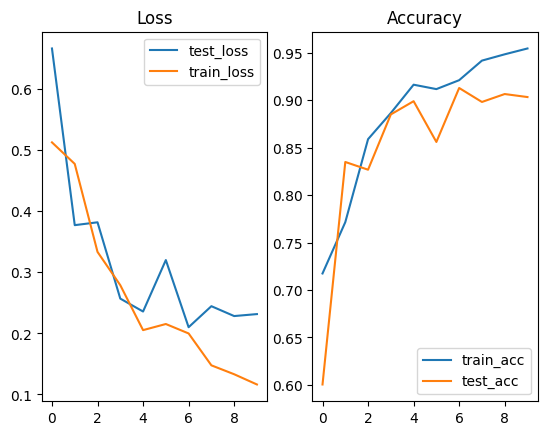

In [72]:
show_models(results_DenseNet_NET)

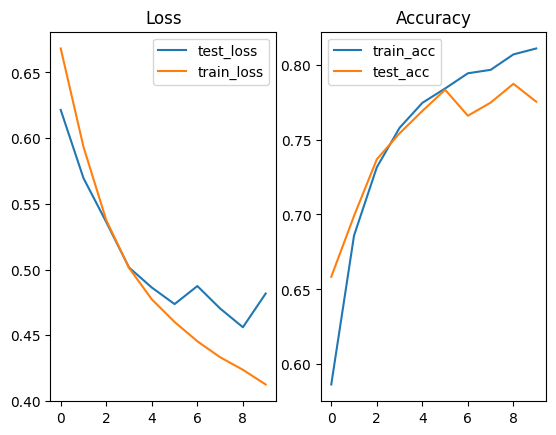

In [73]:
show_models(results)

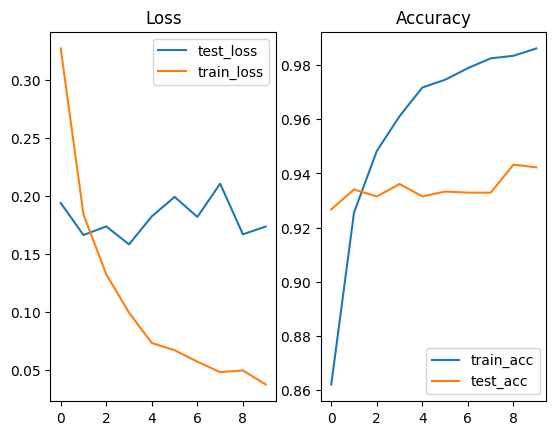

In [74]:
show_models(results_Efficient_NET)